# 1. Data Pre-proccessing Business Hotel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Documents/Mini Project 2 - Investigate Hotel Business using Data Visualization/hotel_bookings_data.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
numericals = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month','stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 
              'children', 'is_repeated_guest', 'previous_cancellations', 
              'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

categoricals = ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 
                'deposit_type', 'customer_type', 'reservation_status']

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df[categoricals].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

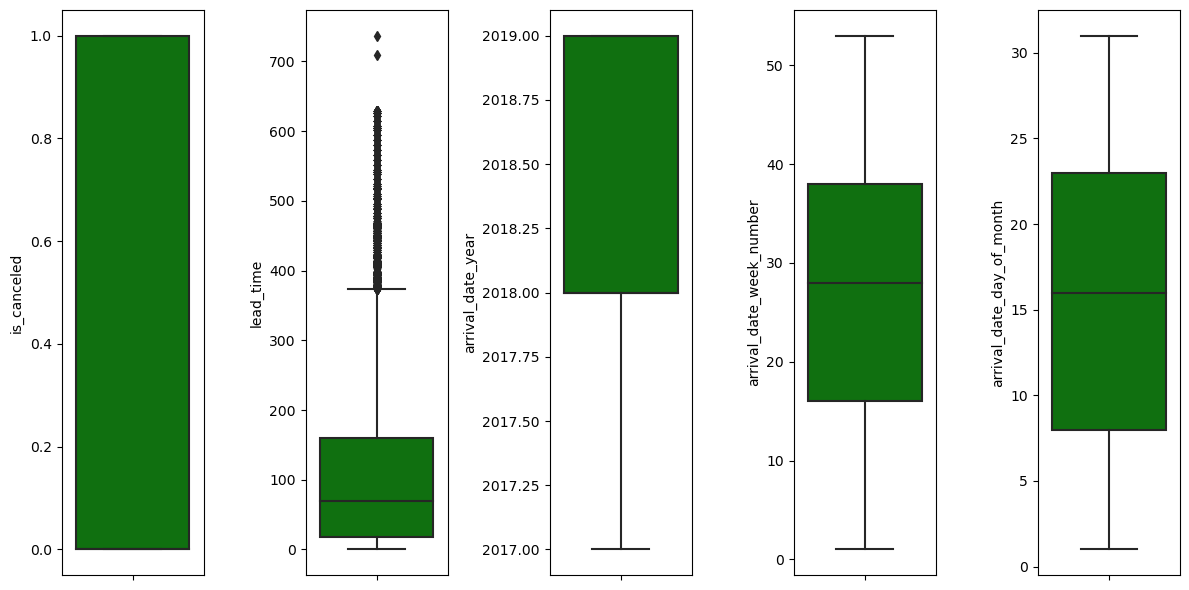

In [8]:
numericals = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month']
plt.figure(figsize=(12,6))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='green', orient='v')
    plt.tight_layout()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

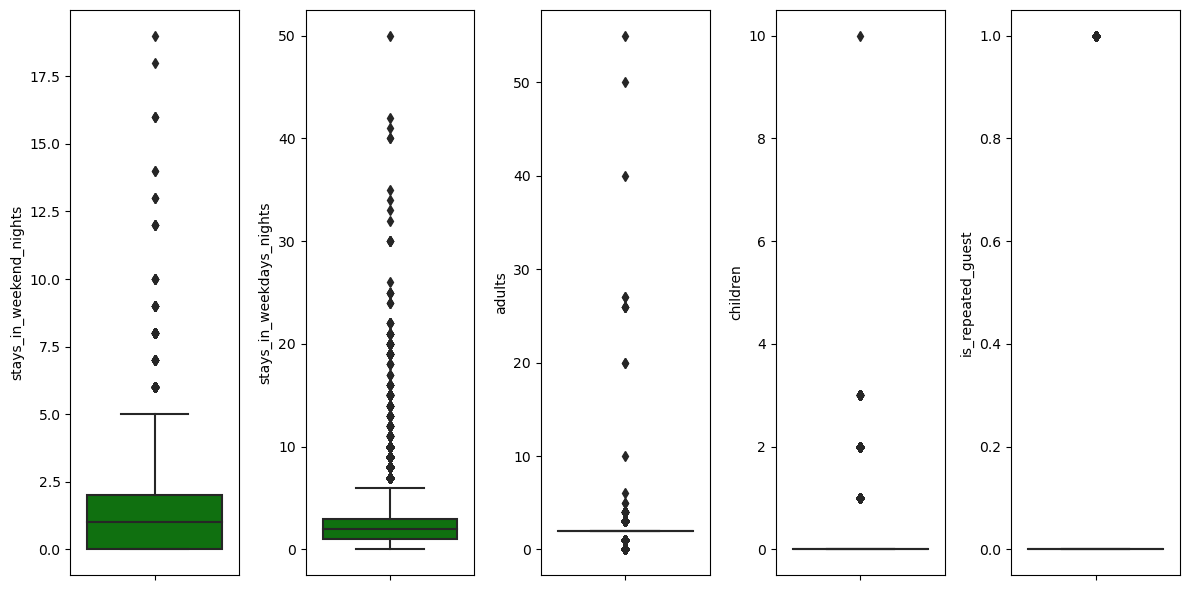

In [10]:
numericals = ['stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'is_repeated_guest' ]
plt.figure(figsize=(12,6))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='green', orient='v')
    plt.tight_layout()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

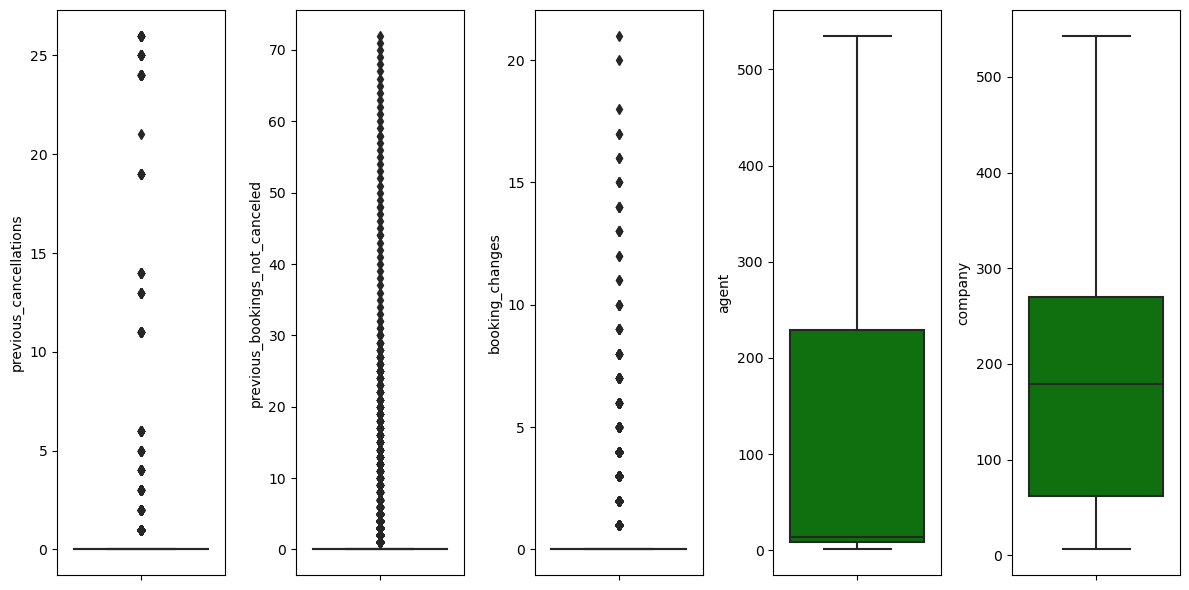

In [11]:
numericals = ['previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company' ]
plt.figure(figsize=(12,6))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='green', orient='v')
    plt.tight_layout()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

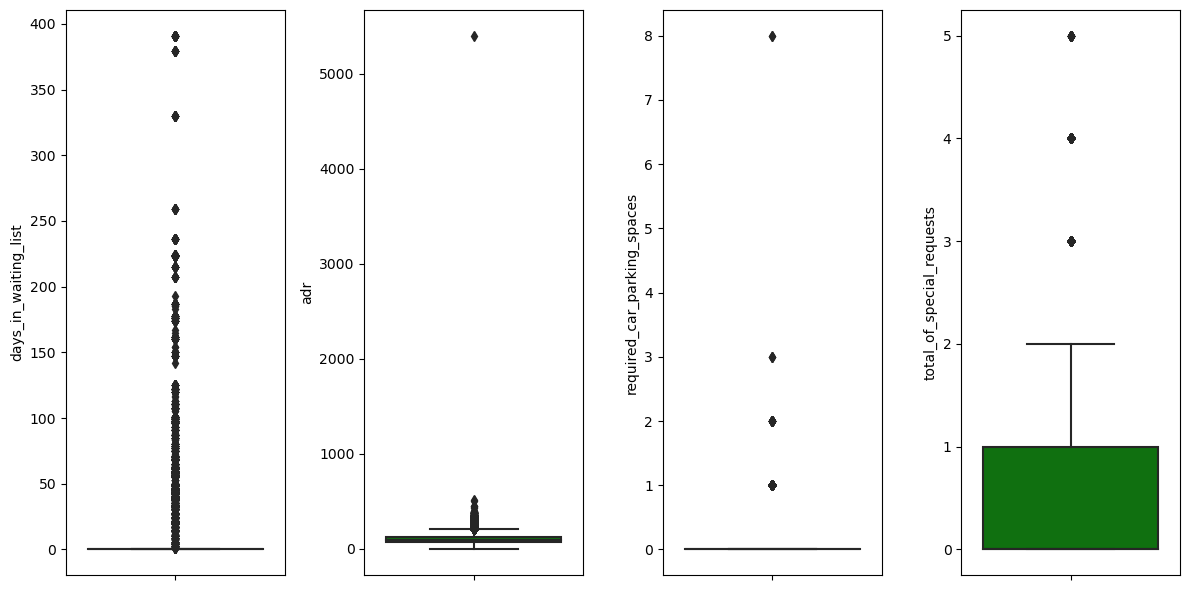

In [12]:
numericals = ['days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]
plt.figure(figsize=(12,6))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='green', orient='v')
    plt.tight_layout()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

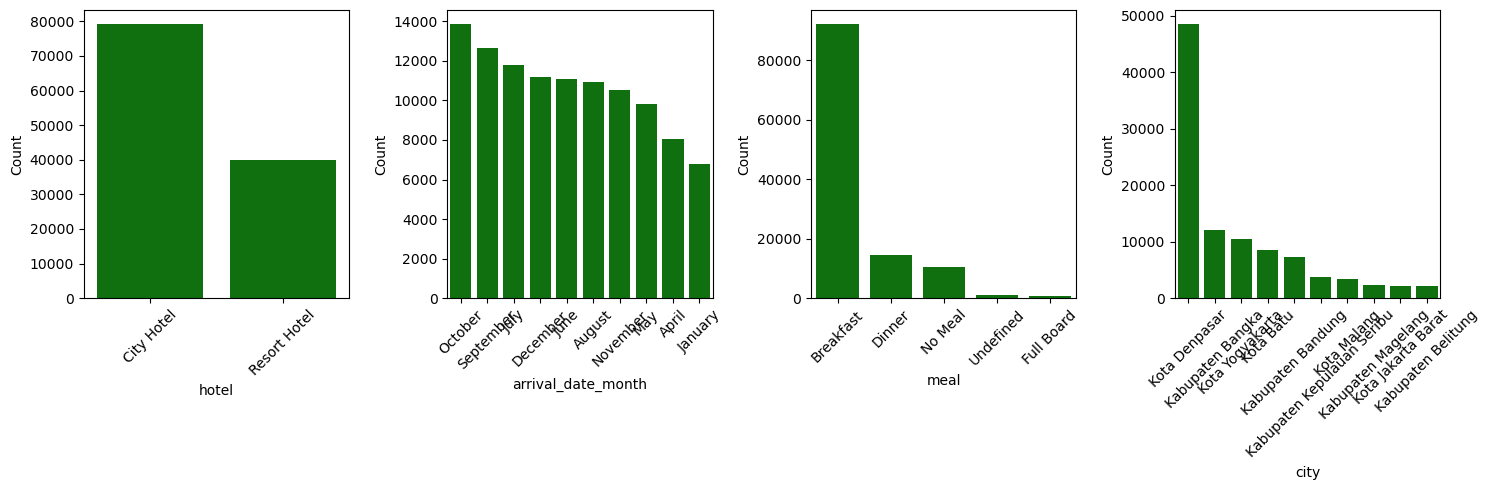

In [13]:
categoricals = ['hotel', 'arrival_date_month', 'meal', 'city']
plt.figure(figsize=(15, 5))

for i in range(0, len(categoricals)):
    plt.subplot(1, len(categoricals), i+1)
    top_10_data = df[categoricals[i]].value_counts().head(10)
    
    sns.barplot(x=top_10_data.index, y=top_10_data.values, color='green')
    plt.xticks(rotation=45)
    plt.xlabel(categoricals[i])
    plt.ylabel('Count')
    plt.tight_layout()


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

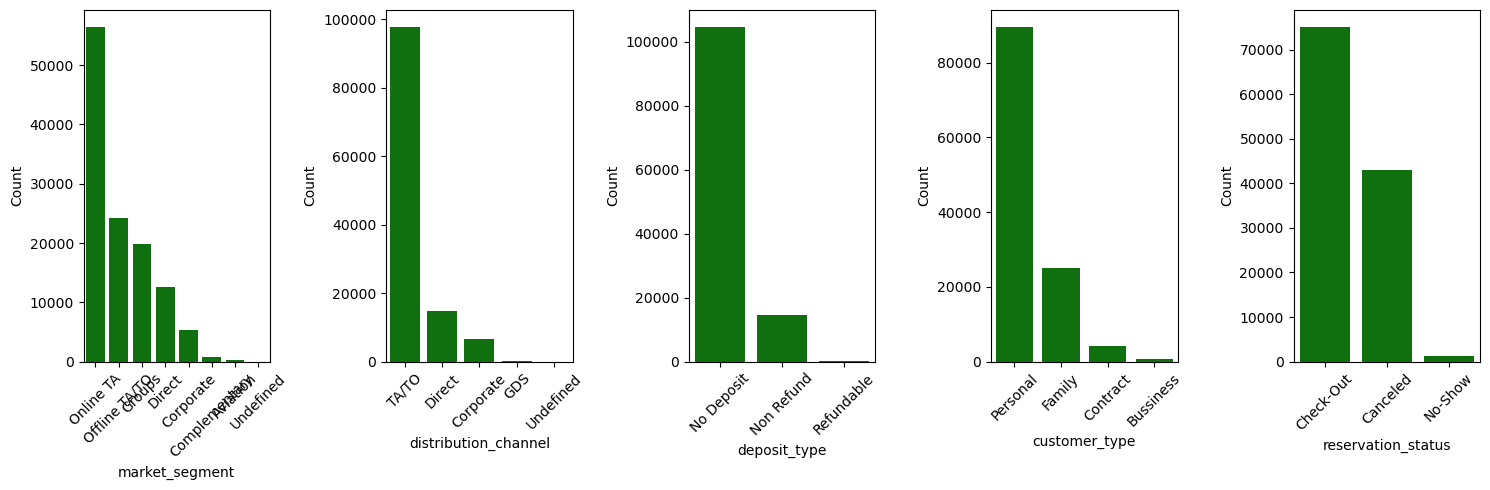

In [14]:
categoricals = ['market_segment', 'distribution_channel', 
                'deposit_type', 'customer_type', 'reservation_status']
plt.figure(figsize=(15, 5))

for i in range(0, len(categoricals)):
    plt.subplot(1, len(categoricals), i+1)
    top_10_data = df[categoricals[i]].value_counts().head(10)
    
    sns.barplot(x=top_10_data.index, y=top_10_data.values, color='green')
    plt.xticks(rotation=45)
    plt.xlabel(categoricals[i])
    plt.ylabel('Count')
    plt.tight_layout()

<Axes: >

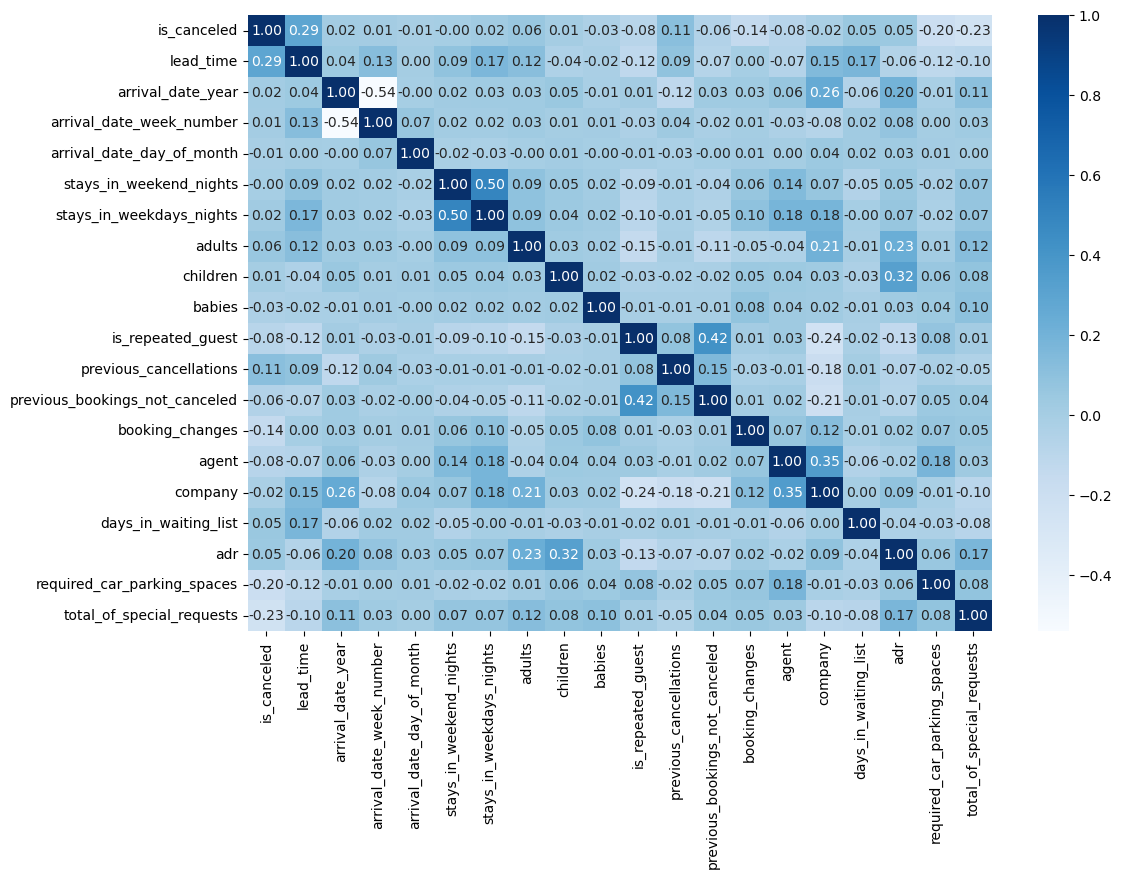

In [15]:
df = df.select_dtypes(exclude=['object'])
df_corr = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(df_corr, cmap='Blues', annot=True, fmt= '.2f')

# 2. Handling Missing Values (Mengatasi data Null)

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [7]:
df['city'] = df['city'].fillna(df['city'].mode()[0])

In [8]:
df['agent'].fillna(df['agent'].mean(), inplace=True)

In [9]:
df.drop('company', axis=1, inplace=True)

In [10]:
df['children'].fillna(df['children'].median(), inplace=True)

In [11]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

### 2b. Handling Duplicated Values

In [12]:
df.duplicated().sum()

33294

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,3,No Deposit,86.693382,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,4,No Deposit,86.693382,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,No Deposit,86.693382,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,0,No Deposit,304.000000,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,No Deposit,240.000000,0,Personal,98.0,0,1,Check-Out


### 2c. Handling Outliers

In [16]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries =((df['lead_time'] >= low_limit) & (df['lead_time'] <= high_limit))
df = df[filtered_entries]

In [17]:
Q1 = df['stays_in_weekdays_nights'].quantile(0.25)
Q3 = df['stays_in_weekdays_nights'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries =((df['stays_in_weekdays_nights'] >= low_limit) & (df['stays_in_weekdays_nights'] <= high_limit))
df = df[filtered_entries]

In [18]:
Q1 = df['adults'].quantile(0.25)
Q3 = df['adults'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries =((df['adults'] >= low_limit) & (df['adults'] <= high_limit))
df = df[filtered_entries]

In [19]:
Q1 = df['children'].quantile(0.25)
Q3 = df['children'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries =((df['children'] >= low_limit) & (df['children'] <= high_limit))
df = df[filtered_entries]

In [20]:
Q1 = df['previous_cancellations'].quantile(0.25)
Q3 = df['previous_cancellations'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries =((df['previous_cancellations'] >= low_limit) & (df['previous_cancellations'] <= high_limit))
df = df[filtered_entries]

In [21]:
Q1 = df['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries =((df['adr'] >= low_limit) & (df['adr'] <= high_limit))
df = df[filtered_entries]

In [22]:
Q1 = df['required_car_parking_spaces'].quantile(0.25)
Q3 = df['required_car_parking_spaces'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries =((df['required_car_parking_spaces'] >= low_limit) & (df['required_car_parking_spaces'] <= high_limit))
df = df[filtered_entries]

In [23]:
Q1 = df['total_of_special_requests'].quantile(0.25)
Q3 = df['total_of_special_requests'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries =((df['total_of_special_requests'] >= low_limit) & (df['total_of_special_requests'] <= high_limit))
df = df[filtered_entries]

# 3. Feature Encoding(Mengganti value yang tidak sesuai)

In [24]:
# Mengganti "Undefined" menjadi "No Meal" hanya dalam kolom "meal"
df['meal'] = df['meal'].replace({'Undefined': 'No Meal'})

# Menampilkan DataFrame setelah penggantian
print(df['meal'])

4          Breakfast
6          Breakfast
7         Full Board
8          Breakfast
9             Dinner
             ...    
119381     Breakfast
119383     Breakfast
119384     Breakfast
119385     Breakfast
119388     Breakfast
Name: meal, Length: 44936, dtype: object


In [25]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,No Deposit,240.000000,0,Personal,98.0,0,1,Check-Out
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,0,No Deposit,86.693382,0,Personal,107.0,0,0,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,0,No Deposit,303.000000,0,Personal,103.0,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,0,No Deposit,240.000000,0,Personal,82.0,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,0,No Deposit,15.000000,0,Personal,105.5,0,0,Canceled


# 4. Membuang data yang tidak diperlukan

In [ ]:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
dtype: int64

Data yang tidak diperlukan disini yang dibuang adalah data company karena jumlah data yang hilang melebihi baris
yang dimiliki sehingga, jika dipertahankan akan mengakibatkan data menjadi bias.

# 2. Monthly Hotel Booking Analysis Based On Hotel Type

### 2.1 Tabel agregat pemesanan Hotel Berdasarkan tipe hotel 

In [28]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,No Deposit,240.000000,0,Personal,98.0,0,1,Check-Out
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,0,No Deposit,86.693382,0,Personal,107.0,0,0,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,0,No Deposit,303.000000,0,Personal,103.0,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,0,No Deposit,240.000000,0,Personal,82.0,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,0,No Deposit,15.000000,0,Personal,105.5,0,0,Canceled


In [26]:
pivot_df = df.pivot_table(fill_value=0, columns='hotel', aggfunc='count', index=['arrival_date_month', 'arrival_date_year'])

In [27]:
pivot_df

adr                  adults  \
hotel                                City Hotel Resort Hotel City Hotel   
arrival_date_month arrival_date_year                                      
April              2018                     883          566        883   
                   2019                    1076          685       1076   
August             2018                    1320          567       1320   
                   2019                    1590          668       1590   
December           2017                     784          545        784   
                   2018                    1439          737       1439   
February           2017                     525          460        525   
                   2018                    1085          530       1085   
January            2017                     385          346        385   
                   2018                    1208          632       1208   
July               2018                    1357          722       1357   
                   2019                    1804          763       1804   
June               2018                    1478          674       1478   
                   2019                    1514          761       1514   
March              2018                     522          383        522   
                   2019                     866          528        866   
May                2018                    1434          737       1434   
                   2019                    1554          512       1554   
November           2017                     825          581        825   
                   2018                    1470          547       1470   
October            2017                     615          660        615   
                   2018                    1478          529       1478   
                   2019                    1346          429       1346   
September          2017                     167          666        167   
                   2018                    1255          574       1255   
                   2019                    1513          641       1513   

                                                       agent               \
hotel                                Resort Hotel City Hotel Resort Hotel   
arrival_date_month arrival_date_year                                        
April              2018                       566        883          566   
                   2019                       685       1076          685   
August             2018                       567       1320          567   
                   2019                       668       1590          668   
December           2017                       545        784          545   
                   2018                       737       1439          737   
February           2017                       460        525          460   
                   2018                       530       1085          530   
January            2017                       346        385          346   
                   2018                       632       1208          632   
July               2018                       722       1357          722   
                   2019                       763       1804          763   
June               2018                       674       1478          674   
                   2019                       761       1514          761   
March              2018                       383        522          383   
                   2019                       528        866          528   
May                2018                       737       1434          737   
                   2019                       512       1554          512   
November           2017                       581        825          581   
                   2018                       547       1470          547   
October            2017                       660        615          660   
                   2

### 2.2 Normalisasi Data

In [28]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,No Deposit,240.000000,0,Personal,98.0,0,1,Check-Out
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,0,No Deposit,86.693382,0,Personal,107.0,0,0,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,0,No Deposit,303.000000,0,Personal,103.0,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,0,No Deposit,240.000000,0,Personal,82.0,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,0,No Deposit,15.000000,0,Personal,105.5,0,0,Canceled


In [28]:
df_new = df.groupby(['hotel', 'arrival_date_month', 'arrival_date_year'])['reservation_status'].count().reset_index()

In [29]:
df_new

,hotel,arrival_date_month,arrival_date_year,reservation_status
0,City Hotel,April,2018,883
1,City Hotel,April,2019,1076
2,City Hotel,August,2018,1320
3,City Hotel,August,2019,1590
4,City Hotel,December,2017,784
5,City Hotel,December,2018,1439
6,City Hotel,February,2017,525
7,City Hotel,February,2018,1085
8,City Hotel,January,2017,385
9,City Hotel,January,2018,1208


In [30]:
scaler = MinMaxScaler()
df_new['reservation_norm'] = scaler.fit_transform(df_new[['reservation_status']])

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

In [31]:
df_new[['reservation_status', 'reservation_norm']].describe()

,reservation_status,reservation_norm
count,52.000000,52.000000
mean,864.153846,0.425873
std,415.231633,0.253654
min,167.000000,0.000000
25%,546.500000,0.231827
50%,703.500000,0.327734
75%,1271.250000,0.674557
max,1804.000000,1.000000


### 2.3 Mengurutkan data berdasarkan bulan

In [32]:
# Daftar nama bulan dalam urutan yang benar
sorted_by_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Buat kolom 'bulan_urutan' yang akan menyimpan urutan bulan sebagai angka
df_new['sorted_by_month'] = df_new['arrival_date_month'].apply(lambda x: sorted_by_month.index(x) + 1)

In [33]:
df_new_sorted = df_new.sort_values(by=['sorted_by_month', 'arrival_date_year'], ascending=[True, True])

In [34]:
df_new_sorted.drop('sorted_by_month', axis=1, inplace=True)

In [35]:
df_new_sorted

,hotel,arrival_date_month,arrival_date_year,reservation_status,reservation_norm
8,City Hotel,January,2017,385,0.133170
34,Resort Hotel,January,2017,346,0.109346
9,City Hotel,January,2018,1208,0.635919
35,Resort Hotel,January,2018,632,0.284056
6,City Hotel,February,2017,525,0.218693
32,Resort Hotel,February,2017,460,0.178986
7,City Hotel,February,2018,1085,0.560782
33,Resort Hotel,February,2018,530,0.221747
14,City Hotel,March,2018,522,0.216860
40,Resort Hotel,March,2018,383,0.131949


### 2.4 Plot Jumlah pemesanan hotel tiap bulannya

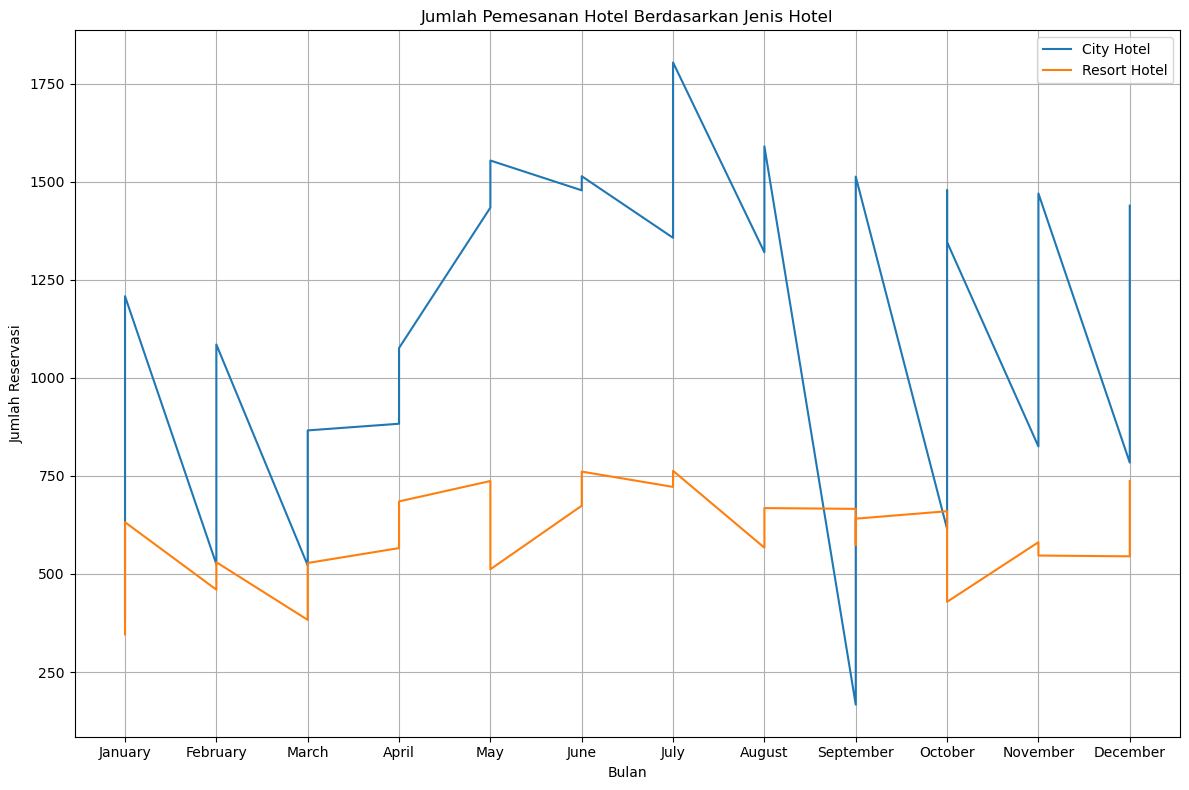

In [41]:
city_hotel_data = df_new_sorted[df_new_sorted['hotel'] == 'City Hotel']
resort_hotel_data = df_new_sorted[df_new_sorted['hotel'] == 'Resort Hotel']

plt.figure(figsize=(12, 8))
plt.plot(city_hotel_data['arrival_date_month'], city_hotel_data['reservation_status'], label='City Hotel')
plt.plot(resort_hotel_data['arrival_date_month'], resort_hotel_data['reservation_status'], label='Resort Hotel')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Reservasi')
plt.title('Jumlah Pemesanan Hotel Berdasarkan Jenis Hotel')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

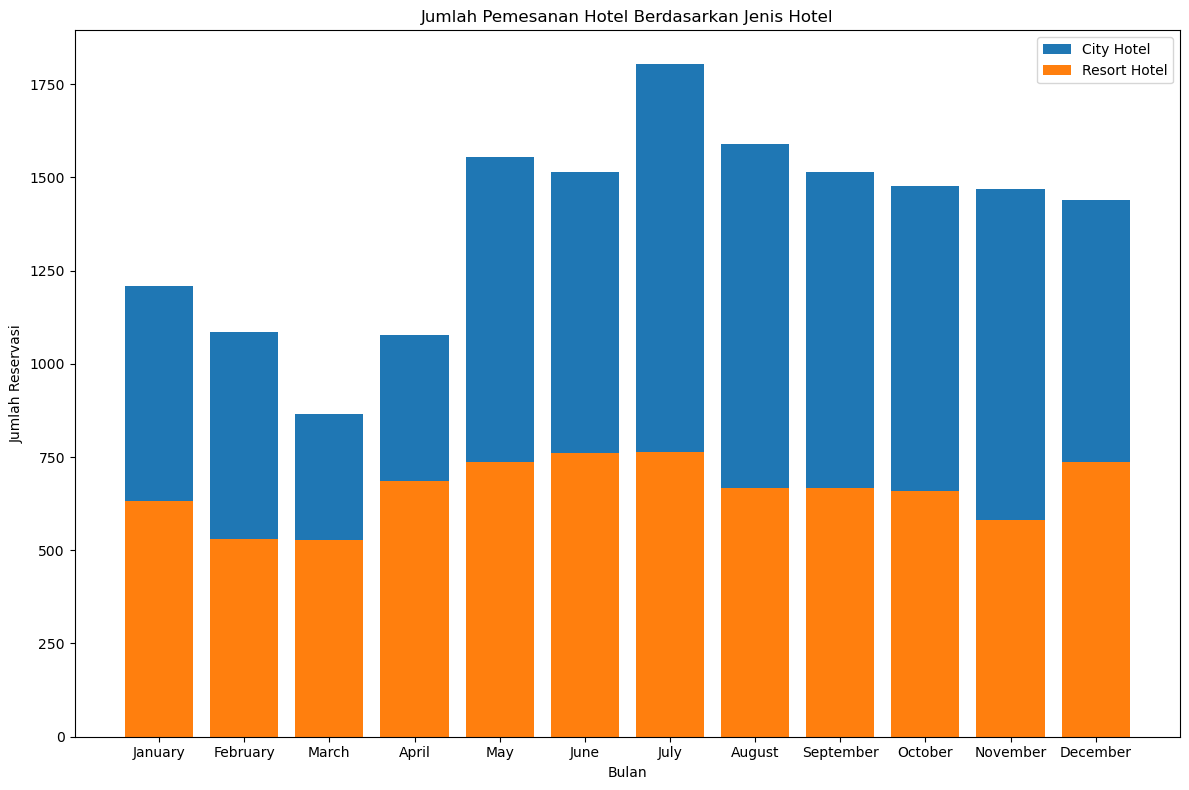

In [42]:
city_hotel_data = df_new_sorted[df_new_sorted['hotel'] == 'City Hotel']
resort_hotel_data = df_new_sorted[df_new_sorted['hotel'] == 'Resort Hotel']

plt.figure(figsize=(12, 8))
plt.bar(city_hotel_data['arrival_date_month'], city_hotel_data['reservation_status'], label='City Hotel')
plt.bar(resort_hotel_data['arrival_date_month'], resort_hotel_data['reservation_status'], label='Resort Hotel')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Reservasi')
plt.title('Jumlah Pemesanan Hotel Berdasarkan Jenis Hotel')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

Berdasarkan grafik bar menunjukkan untuk tren jumlah pemesanan hotel, baik city hotel maupun 
resort hotel mengalami fluktuasi. City hotel memiliki daya minat lebih tinggi daripada resort hotel, selain itu
jumlah pemesanan hotel paling tinggi diantara bulan juni-juli dan paling rendah pada bulan februari-maret, hal ini dikarenakan pada bulan juni-juli merupakan musim liburan sekolah dan musim kemarau sehingga konsumen lebih banyak memesan hotel pada bulan tersebut, sedangkan Februari-Maret merupakan musim hujan dan konsumen masih awal bekerja.

# 3. Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

### 3.1  Kolom baru yang berisi total durasi menginap

In [43]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,No Deposit,240.000000,0,Personal,98.0,0,1,Check-Out
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,0,No Deposit,86.693382,0,Personal,107.0,0,0,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,0,No Deposit,303.000000,0,Personal,103.0,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,0,No Deposit,240.000000,0,Personal,82.0,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,0,No Deposit,15.000000,0,Personal,105.5,0,0,Canceled


In [36]:
df['Total_Stays'] = df['stays_in_weekdays_nights'] + df['stays_in_weekend_nights']

In [37]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Stays
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.000000,0,Personal,98.0,0,1,Check-Out,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,No Deposit,86.693382,0,Personal,107.0,0,0,Check-Out,2
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,No Deposit,303.000000,0,Personal,103.0,0,1,Check-Out,2
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,No Deposit,240.000000,0,Personal,82.0,0,1,Canceled,3
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,No Deposit,15.000000,0,Personal,105.5,0,0,Canceled,3


### 3.2 Kolom baru pengelompokkan berdasarkan total menginap

In [38]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Total_Stays
count,44936.000000,44936.000000,44936.000000,44936.000000,44936.000000,44936.000000,44936.000000,44936.0,44936.0,44936.000000,44936.000000,44936.0,44936.000000,44936.000000,44936.000000,44936.000000,44936.000000,44936.0,44936.000000,44936.000000
mean,0.292705,76.579736,2018.215662,26.411941,15.742500,0.978881,2.494058,2.0,0.0,0.010415,0.013820,0.0,0.022899,0.198327,85.373361,0.561243,98.334840,0.0,0.654664,3.472939
std,0.455009,72.312080,0.679035,13.710309,8.868388,0.887796,1.504745,0.0,0.0,0.111747,0.116743,0.0,0.310903,0.613460,105.265849,8.189947,37.996602,0.0,0.709833,1.958494
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,16.000000,2018.000000,15.000000,8.000000,0.000000,1.000000,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,9.000000,0.000000,74.800000,0.0,0.000000,2.000000
50%,0.000000,54.000000,2018.000000,26.000000,16.000000,1.000000,2.000000,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,0.000000,95.000000,0.0,1.000000,3.000000
75%,1.000000,121.000000,2019.000000,37.000000,23.000000,2.000000,3.000000,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,171.000000,0.000000,123.000000,0.0,1.000000,4.000000
max,1.000000,293.000000,2019.000000,53.000000,31.000000,4.000000,6.000000,2.0,0.0,10.000000,1.000000,0.0,18.000000,16.000000,531.000000,259.000000,205.000000,0.0,2.000000,10.000000


In [39]:
def custom_mapping_stays(Total_Stays):
    if Total_Stays <= 3.472939:
        return '1-5 malam'
    else:
        return '6-10 malam'
df['Total_Stays_custom'] = df['Total_Stays'].apply(custom_mapping_stays)

In [40]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Stays,Total_Stays_custom
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.000000,0,Personal,98.0,0,1,Check-Out,2,1-5 malam
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,No Deposit,86.693382,0,Personal,107.0,0,0,Check-Out,2,1-5 malam
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,No Deposit,303.000000,0,Personal,103.0,0,1,Check-Out,2,1-5 malam
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,No Deposit,240.000000,0,Personal,82.0,0,1,Canceled,3,1-5 malam
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,No Deposit,15.000000,0,Personal,105.5,0,0,Canceled,3,1-5 malam


In [47]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Total_Stays
count,44936.000000,44936.000000,44936.000000,44936.000000,44936.000000,44936.000000,44936.000000,44936.0,44936.0,44936.000000,44936.000000,44936.0,44936.000000,44936.000000,44936.000000,44936.000000,44936.000000,44936.0,44936.000000,44936.000000
mean,0.292705,76.579736,2018.215662,26.411941,15.742500,0.978881,2.494058,2.0,0.0,0.010415,0.013820,0.0,0.022899,0.198327,85.373361,0.561243,98.334840,0.0,0.654664,3.472939
std,0.455009,72.312080,0.679035,13.710309,8.868388,0.887796,1.504745,0.0,0.0,0.111747,0.116743,0.0,0.310903,0.613460,105.265849,8.189947,37.996602,0.0,0.709833,1.958494
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,16.000000,2018.000000,15.000000,8.000000,0.000000,1.000000,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,9.000000,0.000000,74.800000,0.0,0.000000,2.000000
50%,0.000000,54.000000,2018.000000,26.000000,16.000000,1.000000,2.000000,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,0.000000,95.000000,0.0,1.000000,3.000000
75%,1.000000,121.000000,2019.000000,37.000000,23.000000,2.000000,3.000000,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,171.000000,0.000000,123.000000,0.0,1.000000,4.000000
max,1.000000,293.000000,2019.000000,53.000000,31.000000,4.000000,6.000000,2.0,0.0,10.000000,1.000000,0.0,18.000000,16.000000,531.000000,259.000000,205.000000,0.0,2.000000,10.000000


### 3.3 Tabel agregat perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel

In [41]:
pivot_df_new = df.pivot_table(values='Total_Stays', columns='hotel', aggfunc='count', index=['is_canceled', 'reservation_status'])

In [42]:
pivot_df_new

hotel                           City Hotel  Resort Hotel
is_canceled reservation_status                          
0           Check-Out                20439         11344
1           Canceled                  8706          3954
            No-Show                    348           145

### 3.4 Plot Pengaruh Rasio Pembatalan Terhadap Durasi Menginap

In [43]:
df['reservation_status'] = df['reservation_status'].replace('No-Show', 'Canceled')

In [44]:
df['reservation_status'] = df['reservation_status'].map({'Check-Out': 0 , 'Canceled': 1})

In [45]:
df['cancellation_ratio'] = (df['is_canceled'] / (df['is_canceled'] + df['reservation_status'])).fillna(0) * 100

In [46]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Stays,Total_Stays_custom,cancellation_ratio
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240.000000,0,Personal,98.0,0,1,0,2,1-5 malam,0.0
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,86.693382,0,Personal,107.0,0,0,0,2,1-5 malam,0.0
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,303.000000,0,Personal,103.0,0,1,0,2,1-5 malam,0.0
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,240.000000,0,Personal,82.0,0,1,1,3,1-5 malam,50.0
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,15.000000,0,Personal,105.5,0,0,1,3,1-5 malam,50.0


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

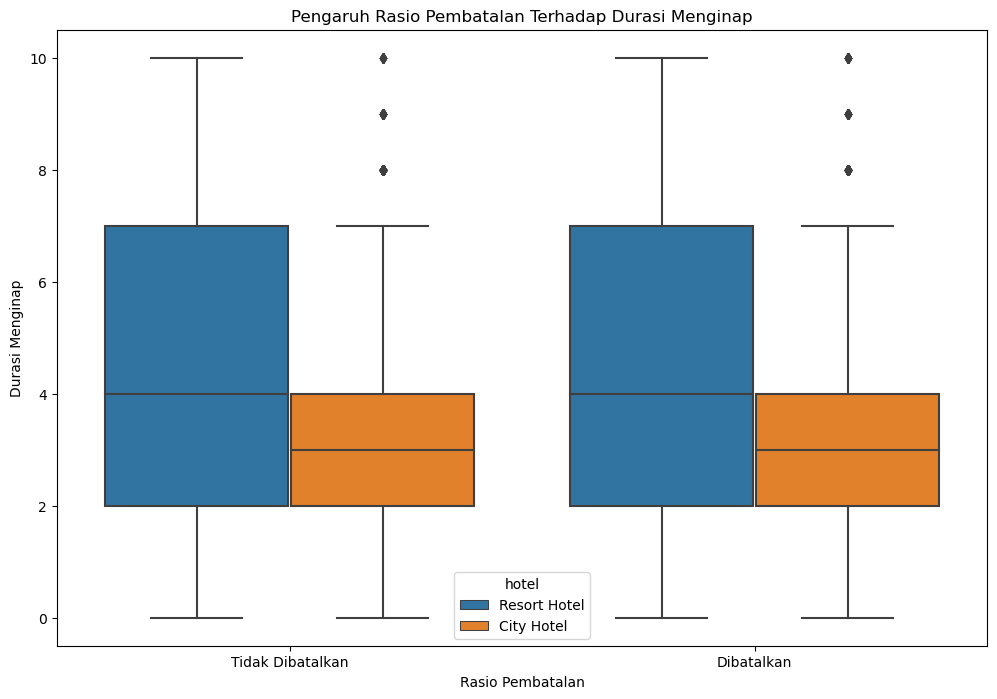

In [60]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_canceled', y='Total_Stays', hue='hotel', data=df)
plt.title('Pengaruh Rasio Pembatalan Terhadap Durasi Menginap')
plt.xlabel('Rasio Pembatalan')
plt.ylabel('Durasi Menginap')
plt.xticks([0, 1], ['Tidak Dibatalkan', 'Dibatalkan'])
plt.grid(False)
plt.show()

# 4. Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate part 2

### 4.1 Kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan

In [27]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,No Deposit,240.000000,0,Personal,98.0,0,1,Check-Out
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,0,No Deposit,86.693382,0,Personal,107.0,0,0,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,0,No Deposit,303.000000,0,Personal,103.0,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,0,No Deposit,240.000000,0,Personal,82.0,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,0,No Deposit,15.000000,0,Personal,105.5,0,0,Canceled


In [28]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,44936.000000,44936.000000,44936.000000,44936.000000,44936.000000,44936.000000,44936.000000,44936.0,44936.0,44936.000000,44936.000000,44936.0,44936.000000,44936.000000,44936.000000,44936.000000,44936.000000,44936.0,44936.000000
mean,0.292705,76.579736,2018.215662,26.411941,15.742500,0.978881,2.494058,2.0,0.0,0.010415,0.013820,0.0,0.022899,0.198327,85.373361,0.561243,98.334840,0.0,0.654664
std,0.455009,72.312080,0.679035,13.710309,8.868388,0.887796,1.504745,0.0,0.0,0.111747,0.116743,0.0,0.310903,0.613460,105.265849,8.189947,37.996602,0.0,0.709833
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,16.000000,2018.000000,15.000000,8.000000,0.000000,1.000000,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,9.000000,0.000000,74.800000,0.0,0.000000
50%,0.000000,54.000000,2018.000000,26.000000,16.000000,1.000000,2.000000,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,0.000000,95.000000,0.0,1.000000
75%,1.000000,121.000000,2019.000000,37.000000,23.000000,2.000000,3.000000,2.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,171.000000,0.000000,123.000000,0.0,1.000000
max,1.000000,293.000000,2019.000000,53.000000,31.000000,4.000000,6.000000,2.0,0.0,10.000000,1.000000,0.0,18.000000,16.000000,531.000000,259.000000,205.000000,0.0,2.000000


In [47]:
interval = 30

df['lead_time_category'] = pd.cut(df['lead_time'], bins=range(0, df['lead_time'].max() + interval, interval), labels=range(1, df['lead_time'].max() // interval + 2))

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Stays,Total_Stays_custom,cancellation_ratio,lead_time_category
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,Personal,98.0,0,1,0,2,1-5 malam,0.0,1
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,Personal,107.0,0,0,0,2,1-5 malam,0.0,NaN
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,Personal,103.0,0,1,0,2,1-5 malam,0.0,1
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,Personal,82.0,0,1,1,3,1-5 malam,50.0,3
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,Personal,105.5,0,0,1,3,1-5 malam,50.0,3


In [31]:
df.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_weekdays_nights             0
adults                               0
children                             0
babies                               0
meal                                 0
city                                 0
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
deposit_type                         0
agent                                0
days_in_waiting_list                 0
customer_type                        0
adr                                  0
required_car_parking_spac

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44936 entries, 4 to 119388
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   hotel                           44936 non-null  object  
 1   is_canceled                     44936 non-null  int64   
 2   lead_time                       44936 non-null  int64   
 3   arrival_date_year               44936 non-null  int64   
 4   arrival_date_month              44936 non-null  object  
 5   arrival_date_week_number        44936 non-null  int64   
 6   arrival_date_day_of_month       44936 non-null  int64   
 7   stays_in_weekend_nights         44936 non-null  int64   
 8   stays_in_weekdays_nights        44936 non-null  int64   
 9   adults                          44936 non-null  int64   
 10  children                        44936 non-null  float64 
 11  babies                          44936 non-null  int64   
 12  meal                  

In [48]:
df['lead_time_category'] = df['lead_time_category'].fillna(df['lead_time_category'].mode()[0])

In [49]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [58]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,lead_time_category,cancellation_ratio
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.000000,0,Personal,98.0,0,1,0,1,0.0
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,No Deposit,86.693382,0,Personal,107.0,0,0,0,1,0.0
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,No Deposit,303.000000,0,Personal,103.0,0,1,0,1,0.0
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,No Deposit,240.000000,0,Personal,82.0,0,1,1,3,50.0
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,No Deposit,15.000000,0,Personal,105.5,0,0,1,3,50.0


### 4.2 Tabel agregat perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel

In [50]:
pivot_df_new = df.pivot_table(values='lead_time', columns='lead_time_category', aggfunc='count', index=['is_canceled', 'hotel'], margins=True, margins_name='Total')

In [51]:
pivot_df_new

lead_time_category            1     2     3     4     5     6     7     8  \
is_canceled hotel                                                           
0           City Hotel     8083  3699  2555  1883  1460  1111   747   470   
            Resort Hotel   5067  1543  1085   835   666   745   512   439   
1           City Hotel     2128  1712  1315  1081   817   729   521   342   
            Resort Hotel    879   737   560   461   384   322   288   215   
Total                     16157  7691  5515  4260  3327  2907  2068  1466   

lead_time_category          9   10  Total  
is_canceled hotel                          
0           City Hotel    274  157  20439  
            Resort Hotel  267  185  11344  
1           City Hotel    253  156   9054  
            Resort Hotel  172   81   4099  
Total                     966  579  44936

### 4.3 Plot rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel 

In [52]:
df['is_canceled'] = df['is_canceled'].map({0: 'Tidak Dibatalkan', 1: 'Dibatalkan'})

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

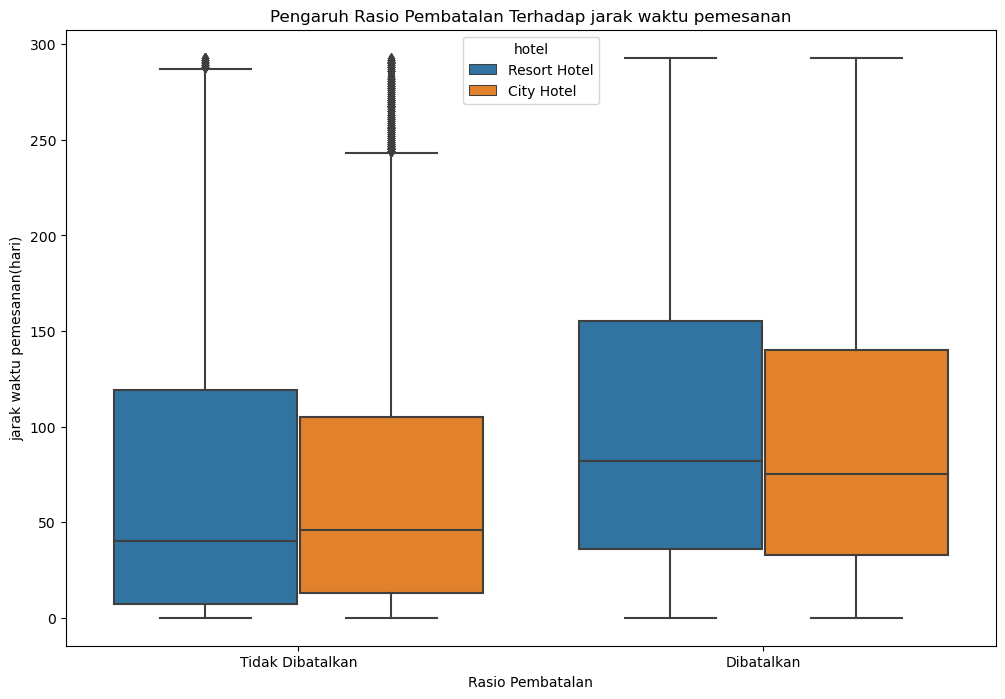

In [56]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_canceled', y='lead_time', hue='hotel', data=df)
plt.title('Pengaruh Rasio Pembatalan Terhadap jarak waktu pemesanan')
plt.xlabel('Rasio Pembatalan')
plt.ylabel('jarak waktu pemesanan(hari)')
plt.xticks([0, 1], ['Tidak Dibatalkan', 'Dibatalkan'])
plt.grid(False)
plt.show()